# Using Stateful Graphs

In [2]:
import os
import sys
import random
import json
from pydantic import BaseModel, Field
from dataclasses import dataclass, field

from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import HumanMessage, SystemMessage, BaseMessage, FunctionMessage
from langchain_openai import OpenAI, ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.graph.message import add_messages
from langchain_core.tools import tool

from IPython.display import Image, display

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.utils import set_chatgpt_env, set_langsmith_env

In [3]:
set_langsmith_env()
set_chatgpt_env()

In [16]:
@dataclass
class GraphState:
    messages: Annotated[Sequence[BaseMessage], add_messages] = field(default_factory=list)
    steps: int = field(default=0)


def func_green(state):
    print('function Green')
    print(state)
    return {
        "messages": state.messages + [SystemMessage(content="Green function executed")],
        "steps": state.steps + 1
    }

def func_yellow(state):
    print('function Yellow')
    print(state)
    return {
        "messages": state.messages + [SystemMessage(content="Yellow function executed")],
        "steps": state.steps + 1
    }
    
    return {
        "messages": current_messages + [SystemMessage(content="Yellow function executed")],
        "steps": current_steps + 1
    }


workflow = StateGraph(GraphState)
workflow.add_node("green", func_green)
workflow.add_node("yellow", func_yellow)
workflow.add_edge(START, "green")
workflow.add_edge("green", "yellow")
workflow.add_edge("yellow", END)

graph = workflow.compile()

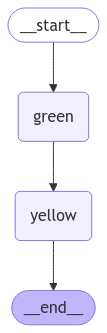

In [14]:
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [18]:
result = graph.invoke({
    "messages": [],
    "steps": 0
})

function Green
GraphState(messages=[], steps=0)
function Yellow
GraphState(messages=[SystemMessage(content='Green function executed', additional_kwargs={}, response_metadata={}, id='f6f7df92-0c73-49d2-8f92-1b575451b25a')], steps=1)
